In [25]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

RANDOM_SEED = 42

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
df_train = pd.read_csv('../data/train.csv')
df_train.shape

(7905, 20)

In [28]:
df_test = pd.read_csv('../data/test.csv')
df_test.shape

(5271, 19)

In [29]:
df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [30]:
df_train[df_train.duplicated()]

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status


In [31]:
df_train.isna().any()

id               False
N_Days           False
Drug             False
Age              False
Sex              False
Ascites          False
Hepatomegaly     False
Spiders          False
Edema            False
Bilirubin        False
Cholesterol      False
Albumin          False
Copper           False
Alk_Phos         False
SGOT             False
Tryglicerides    False
Platelets        False
Prothrombin      False
Stage            False
Status           False
dtype: bool

In [32]:
#df.drop('id', axis = 1, inplace=True)

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [34]:
num_cols = df_train.select_dtypes('number').columns.drop('id')
num_cols

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'], dtype='object')

In [35]:
for num_col in num_cols:
    print(f'{df_train[num_col].describe()}\n')

count    7905.000000
mean     2030.173308
std      1094.233744
min        41.000000
25%      1230.000000
50%      1831.000000
75%      2689.000000
max      4795.000000
Name: N_Days, dtype: float64

count     7905.000000
mean     18373.146490
std       3679.958739
min       9598.000000
25%      15574.000000
50%      18713.000000
75%      20684.000000
max      28650.000000
Name: Age, dtype: float64

count    7905.000000
mean        2.594485
std         3.812960
min         0.300000
25%         0.700000
50%         1.100000
75%         3.000000
max        28.000000
Name: Bilirubin, dtype: float64

count    7905.000000
mean      350.561923
std       195.379344
min       120.000000
25%       248.000000
50%       298.000000
75%       390.000000
max      1775.000000
Name: Cholesterol, dtype: float64

count    7905.000000
mean        3.548323
std         0.346171
min         1.960000
25%         3.350000
50%         3.580000
75%         3.770000
max         4.640000
Name: Albumin, dtype: float

In [36]:
df_train['Age_category'] = df_train.Age.apply(lambda x: 'Old' if x > df_train.Age.quantile(0.75) else ('Middle' if x <= df_train.Age.quantile(0.75) and x > df_train.Age.quantile(0.25) else 'Young'))
df_train['N_Days_category'] = df_train.N_Days.apply(lambda x: 'Many' if x > df_train.N_Days.quantile(0.75) else ('Middle' if x <= df_train.N_Days.quantile(0.75) and x > df_train.N_Days.quantile(0.25) else 'Few'))
df_train['Bilirubin_category'] = df_train.Bilirubin.apply(lambda x: 'High' if x > df_train.Bilirubin.quantile(0.75) else ('Middle' if x <= df_train.Bilirubin.quantile(0.75) and x > df_train.Bilirubin.quantile(0.25) else 'Low'))
df_train['Cholesterol_category'] = df_train.Cholesterol.apply(lambda x: 'High' if x > df_train.Cholesterol.quantile(0.75) else ('Middle' if x <= df_train.Cholesterol.quantile(0.75) and x > df_train.Cholesterol.quantile(0.25) else 'Low'))
df_train['Albumin_category'] = df_train.Albumin.apply(lambda x: 'High' if x > df_train.Albumin.quantile(0.75) else ('Middle' if x <= df_train.Albumin.quantile(0.75) and x > df_train.Albumin.quantile(0.25) else 'Low'))
df_train['Copper_category'] = df_train.Copper.apply(lambda x: 'High' if x > df_train.Copper.quantile(0.75) else ('Middle' if x <= df_train.Copper.quantile(0.75) and x > df_train.Copper.quantile(0.25) else 'Low'))
df_train['Alk_Phos_category'] = df_train.Alk_Phos.apply(lambda x: 'High' if x > df_train.Alk_Phos.quantile(0.75) else ('Middle' if x <= df_train.Alk_Phos.quantile(0.75) and x > df_train.Alk_Phos.quantile(0.25) else 'Low'))
df_train['SGOT_category'] = df_train.SGOT.apply(lambda x: 'High' if x > df_train.SGOT.quantile(0.75) else ('Middle' if x <= df_train.SGOT.quantile(0.75) and x > df_train.SGOT.quantile(0.25) else 'Low'))
df_train['Tryglicerides_category'] = df_train.Tryglicerides.apply(lambda x: 'High' if x > df_train.Tryglicerides.quantile(0.75) else ('Middle' if x <= df_train.Tryglicerides.quantile(0.75) and x > df_train.Tryglicerides.quantile(0.25) else 'Low'))
df_train['Platelets_category'] = df_train.Platelets.apply(lambda x: 'High' if x > df_train.Platelets.quantile(0.75) else ('Middle' if x <= df_train.Platelets.quantile(0.75) and x > df_train.Platelets.quantile(0.25) else 'Low'))
df_train['Prothrombin_category'] = df_train.Prothrombin.apply(lambda x: 'High' if x > df_train.Prothrombin.quantile(0.75) else ('Middle' if x <= df_train.Prothrombin.quantile(0.75) and x > df_train.Prothrombin.quantile(0.25) else 'Low'))
df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Age_category,N_Days_category,Bilirubin_category,Cholesterol_category,Albumin_category,Copper_category,Alk_Phos_category,SGOT_category,Tryglicerides_category,Platelets_category,Prothrombin_category
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,Old,Few,Middle,Middle,Low,High,Middle,High,Low,High,Low
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,High,Middle
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,Young,Many,High,Middle,Middle,High,Middle,Middle,Low,Low,High
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C,Middle,Middle,Low,Middle,Middle,Middle,Middle,Low,Middle,Middle,Middle
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C,Middle,Few,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle


In [37]:
obj_cols = df_train.select_dtypes('object').columns.drop('Status')
obj_cols

Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Age_category', 'N_Days_category', 'Bilirubin_category', 'Cholesterol_category', 'Albumin_category', 'Copper_category', 'Alk_Phos_category', 'SGOT_category', 'Tryglicerides_category', 'Platelets_category', 'Prothrombin_category'], dtype='object')

In [38]:
for obj_col in obj_cols:
    print(f'{df_train[obj_col].value_counts()}\n')

Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64

Sex
F    7336
M     569
Name: count, dtype: int64

Ascites
N    7525
Y     380
Name: count, dtype: int64

Hepatomegaly
Y    4042
N    3863
Name: count, dtype: int64

Spiders
N    5966
Y    1939
Name: count, dtype: int64

Edema
N    7161
S     399
Y     345
Name: count, dtype: int64

Age_category
Middle    4002
Young     1988
Old       1915
Name: count, dtype: int64

N_Days_category
Middle    3955
Few       1987
Many      1963
Name: count, dtype: int64

Bilirubin_category
Middle    3692
Low       2284
High      1929
Name: count, dtype: int64

Cholesterol_category
Middle    3871
Low       2063
High      1971
Name: count, dtype: int64

Albumin_category
Middle    4048
Low       2051
High      1806
Name: count, dtype: int64

Copper_category
Middle    3868
Low       2136
High      1901
Name: count, dtype: int64

Alk_Phos_category
Middle    3953
Low       1995
High      1957
Name: count, dtype: int64

SGOT_categor

In [39]:
binary_cols = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders']

In [40]:
for bin_col in binary_cols:
    df_train[bin_col] = df_train[bin_col].apply(lambda x: 1 if x == 'y' or x == 'M' else 0)

In [41]:
df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Age_category,N_Days_category,Bilirubin_category,Cholesterol_category,Albumin_category,Copper_category,Alk_Phos_category,SGOT_category,Tryglicerides_category,Platelets_category,Prothrombin_category
0,0,999,D-penicillamine,21532,1,0,0,0,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,Old,Few,Middle,Middle,Low,High,Middle,High,Low,High,Low
1,1,2574,Placebo,19237,0,0,0,0,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,High,Middle
2,2,3428,Placebo,13727,0,0,0,0,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,Young,Many,High,Middle,Middle,High,Middle,Middle,Low,Low,High
3,3,2576,Placebo,18460,0,0,0,0,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C,Middle,Middle,Low,Middle,Middle,Middle,Middle,Low,Middle,Middle,Middle
4,4,788,Placebo,16658,0,0,0,0,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C,Middle,Few,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle


In [42]:
df_train.Drug = df_train.Drug.apply(lambda x: 1 if x == 'D-penicillamine' else 0)

In [43]:
obj_cols = obj_cols.drop('Drug')
obj_cols = obj_cols.drop(binary_cols)
obj_cols

Index(['Edema', 'Age_category', 'N_Days_category', 'Bilirubin_category', 'Cholesterol_category', 'Albumin_category', 'Copper_category', 'Alk_Phos_category', 'SGOT_category', 'Tryglicerides_category', 'Platelets_category', 'Prothrombin_category'], dtype='object')

In [44]:
df_sc = df_train.copy()

In [45]:
num_cols = num_cols.drop('Stage')

In [46]:
df_train['Stage'] = df_train['Stage'].astype(int)
df_train['Stage'].value_counts()

Stage
3    3153
4    2703
2    1652
1     397
Name: count, dtype: int64

In [47]:
obj_cols  = np.append(obj_cols, 'Stage')
obj_cols

array(['Edema', 'Age_category', 'N_Days_category', 'Bilirubin_category',
       'Cholesterol_category', 'Albumin_category', 'Copper_category',
       'Alk_Phos_category', 'SGOT_category', 'Tryglicerides_category',
       'Platelets_category', 'Prothrombin_category', 'Stage'],
      dtype=object)

In [48]:
std_scaler = StandardScaler()

In [49]:
std_scaler.fit(df_sc[num_cols])
std_scaled = std_scaler.transform(df_sc[num_cols])

In [50]:
df_sc[num_cols] = std_scaled
df_sc.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Age_category,N_Days_category,Bilirubin_category,Cholesterol_category,Albumin_category,Copper_category,Alk_Phos_category,SGOT_category,Tryglicerides_category,Platelets_category,Prothrombin_category
0,0,-0.942430,1,0.858448,1,0,0,0,N,-0.077237,-0.176908,-0.572940,1.160785,-0.113334,1.336304,-0.996442,1.472341,-1.189049,3.0,D,Old,Few,Middle,Middle,Low,High,Middle,High,Low,High,Low
1,1,0.497025,0,0.234760,0,0,0,0,N,-0.444429,0.068784,-0.024043,-0.275420,-0.197909,0.414968,-0.520497,1.095026,0.474024,3.0,C,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,High,Middle
2,2,1.277529,0,-1.262634,0,0,0,0,Y,0.185043,-0.263923,0.004846,0.620561,-0.413812,0.097266,-1.243933,-0.757248,1.369525,4.0,D,Young,Many,High,Middle,Middle,High,Middle,Middle,Low,Low,High
3,3,0.498852,0,0.023603,0,0,0,0,N,-0.523113,-0.484022,-0.139601,-0.341301,-0.086017,-0.887610,-0.368194,0.043117,0.090238,3.0,C,Middle,Middle,Low,Middle,Middle,Middle,Middle,Low,Middle,Middle,Middle
4,4,-1.135271,0,-0.466107,0,0,0,0,N,-0.391973,-0.023351,0.293739,-0.275420,-0.333965,0.224347,-0.368194,0.374697,-0.037691,4.0,C,Middle,Few,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle


In [51]:
preprocessing_dict = {}
preprocessing_dict['scaler'] = std_scaler

In [52]:
df_category = df_sc.copy()
df_category.shape

(7905, 31)

In [53]:
cat_cols = obj_cols
cat_cols

array(['Edema', 'Age_category', 'N_Days_category', 'Bilirubin_category',
       'Cholesterol_category', 'Albumin_category', 'Copper_category',
       'Alk_Phos_category', 'SGOT_category', 'Tryglicerides_category',
       'Platelets_category', 'Prothrombin_category', 'Stage'],
      dtype=object)

In [54]:
df_category.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Age_category,N_Days_category,Bilirubin_category,Cholesterol_category,Albumin_category,Copper_category,Alk_Phos_category,SGOT_category,Tryglicerides_category,Platelets_category,Prothrombin_category
0,0,-0.942430,1,0.858448,1,0,0,0,N,-0.077237,-0.176908,-0.572940,1.160785,-0.113334,1.336304,-0.996442,1.472341,-1.189049,3.0,D,Old,Few,Middle,Middle,Low,High,Middle,High,Low,High,Low
1,1,0.497025,0,0.234760,0,0,0,0,N,-0.444429,0.068784,-0.024043,-0.275420,-0.197909,0.414968,-0.520497,1.095026,0.474024,3.0,C,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,High,Middle
2,2,1.277529,0,-1.262634,0,0,0,0,Y,0.185043,-0.263923,0.004846,0.620561,-0.413812,0.097266,-1.243933,-0.757248,1.369525,4.0,D,Young,Many,High,Middle,Middle,High,Middle,Middle,Low,Low,High
3,3,0.498852,0,0.023603,0,0,0,0,N,-0.523113,-0.484022,-0.139601,-0.341301,-0.086017,-0.887610,-0.368194,0.043117,0.090238,3.0,C,Middle,Middle,Low,Middle,Middle,Middle,Middle,Low,Middle,Middle,Middle
4,4,-1.135271,0,-0.466107,0,0,0,0,N,-0.391973,-0.023351,0.293739,-0.275420,-0.333965,0.224347,-0.368194,0.374697,-0.037691,4.0,C,Middle,Few,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle,Middle


In [55]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [56]:
ohe.fit(df_category[cat_cols])
ft = ohe.transform(df_category[cat_cols])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
df_category.reset_index(drop=True, inplace=True)
df_ft.reset_index(drop=True, inplace=True)
df_ft = df_ft.astype('int64')
df_category = pd.concat([df_category, df_ft], axis=1)
df_category.drop(cat_cols, inplace = True, axis = 1)

In [57]:
preprocessing_dict['encoder'] = ohe

In [58]:
df_category.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Status,Edema_N,Edema_S,Edema_Y,Age_category_Middle,Age_category_Old,Age_category_Young,N_Days_category_Few,N_Days_category_Many,N_Days_category_Middle,Bilirubin_category_High,Bilirubin_category_Low,Bilirubin_category_Middle,Cholesterol_category_High,Cholesterol_category_Low,Cholesterol_category_Middle,Albumin_category_High,Albumin_category_Low,Albumin_category_Middle,Copper_category_High,Copper_category_Low,Copper_category_Middle,Alk_Phos_category_High,Alk_Phos_category_Low,Alk_Phos_category_Middle,SGOT_category_High,SGOT_category_Low,SGOT_category_Middle,Tryglicerides_category_High,Tryglicerides_category_Low,Tryglicerides_category_Middle,Platelets_category_High,Platelets_category_Low,Platelets_category_Middle,Prothrombin_category_High,Prothrombin_category_Low,Prothrombin_category_Middle,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
0,0,-0.942430,1,0.858448,1,0,0,0,-0.077237,-0.176908,-0.572940,1.160785,-0.113334,1.336304,-0.996442,1.472341,-1.189049,D,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,1,0.497025,0,0.234760,0,0,0,0,-0.444429,0.068784,-0.024043,-0.275420,-0.197909,0.414968,-0.520497,1.095026,0.474024,C,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0
2,2,1.277529,0,-1.262634,0,0,0,0,0.185043,-0.263923,0.004846,0.620561,-0.413812,0.097266,-1.243933,-0.757248,1.369525,D,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1
3,3,0.498852,0,0.023603,0,0,0,0,-0.523113,-0.484022,-0.139601,-0.341301,-0.086017,-0.887610,-0.368194,0.043117,0.090238,C,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
4,4,-1.135271,0,-0.466107,0,0,0,0,-0.391973,-0.023351,0.293739,-0.275420,-0.333965,0.224347,-0.368194,0.374697,-0.037691,C,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1


In [60]:
df_final = df_category.copy()

In [189]:
with open('../pickles/prep_tools.pickle', 'wb') as file:
    pickle.dump(preprocessing_dict, file)

In [130]:
df_final.to_csv('../data/df_final.csv', index = False)

<Axes: >

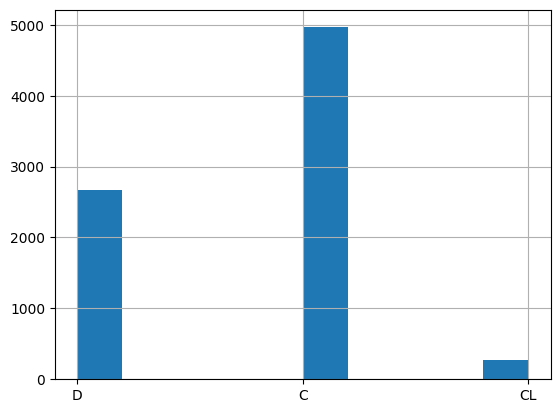

In [61]:
df_final.Status.hist()

X_train: (6324, 56)
y_train: (6324,)


<Axes: >

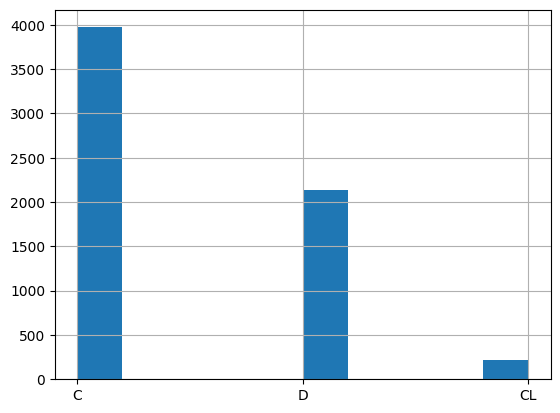

In [62]:
df_train, df_test = train_test_split(df_final, stratify=df_final['Status'], test_size=0.2, random_state=RANDOM_SEED)

X_train = df_train.drop(['id', 'Status'], axis = 1)
y_train = df_train['Status']

X_test = df_test.drop(['id', 'Status'], axis = 1)
y_test = df_test['Status']
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
y_train.hist()

In [72]:
os = SMOTE(random_state=RANDOM_SEED)
features = df_train.columns.to_list()
print(len(features))
features.remove('Status')
features.remove('id')
print(len(features))
target = 'Status'
X_train, y_train = os.fit_resample(df_train[features], df_train[target])

58
56


X_train: (11916, 56)
y_train: (11916,)


<Axes: >

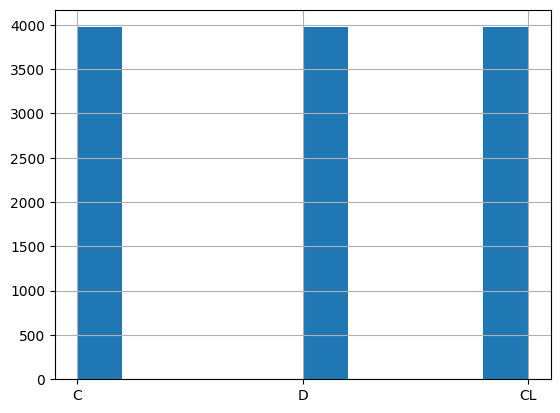

In [73]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
y_train.hist()

In [63]:
log_reg_model = LogisticRegression(n_jobs=-1, random_state=RANDOM_SEED)
r_f_model = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state = RANDOM_SEED)
hgbc_model = HistGradientBoostingClassifier(class_weight = 'balanced',  scoring = 'accuracy', random_state=RANDOM_SEED)
mlp_model = MLPClassifier(shuffle = True, early_stopping = True, random_state = RANDOM_SEED)
svc_model = SVC(class_weight='balanced', probability = True, random_state=RANDOM_SEED)
knn_model = KNeighborsClassifier(n_neighbors=8, algorithm = 'kd_tree', p = 1, weights = 'distance', n_jobs=-1)
cat_boosting_model = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=7, l2_leaf_reg=9, 
                              bootstrap_type='Bayesian', eval_metric='Accuracy', 
                              auto_class_weights='Balanced', allow_writing_files=False, silent = True)

models = [log_reg_model, r_f_model, hgbc_model, mlp_model, svc_model, knn_model, cat_boosting_model]

In [65]:
for model in models:
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_prob_test = model.predict_proba(X_test)
    log_loss_test = log_loss(y_test, y_pred_prob_test)
    accuracy_score_test = accuracy_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test, pos_label='positive', average='micro')
    precision_test = precision_score(y_test, y_pred_test, pos_label='positive', average='micro')
    recall_test = recall_score(y_test, y_pred_test, pos_label='positive', average='micro')
    roc_auc_test = roc_auc_score(y_test, y_pred_prob_test, multi_class='ovr')
    
    print(f'Модель: {type(model).__name__}\nLog loss: {log_loss_test}\nAccuracy: {accuracy_score_test}\nf1 score: {f1_test}\nPrecision: {precision_test}\nRecall: {recall_test}\nROC_AUC: {roc_auc_test}\n')

Модель: LogisticRegression
Log loss: 0.5125436591462421
Accuracy: 0.8083491461100569
f1 score: 0.8083491461100569
Precision: 0.8083491461100569
Recall: 0.8083491461100569
ROC_AUC: 0.8296788931930731

Модель: RandomForestClassifier
Log loss: 0.5727040420886271
Accuracy: 0.8153067678684377
f1 score: 0.8153067678684377
Precision: 0.8153067678684377
Recall: 0.8153067678684377
ROC_AUC: 0.860452606869945

Модель: HistGradientBoostingClassifier
Log loss: 0.5203564897224869
Accuracy: 0.8134092346616065
f1 score: 0.8134092346616065
Precision: 0.8134092346616065
Recall: 0.8134092346616065
ROC_AUC: 0.8528128026338001

Модель: MLPClassifier
Log loss: 0.5034766032794098
Accuracy: 0.8077166350411132
f1 score: 0.8077166350411132
Precision: 0.8077166350411132
Recall: 0.8077166350411132
ROC_AUC: 0.8433248812719141

Модель: SVC
Log loss: 0.5033374523658238
Accuracy: 0.7539531941808981
f1 score: 0.7539531941808981
Precision: 0.7539531941808981
Recall: 0.7539531941808981
ROC_AUC: 0.8351649065016838

Модел

In [43]:
hgbc_model = HistGradientBoostingClassifier(loss = 'log_loss', class_weight = 'balanced',  scoring = 'accuracy', random_state=RANDOM_SEED)
hgbc_model.fit(X_train, y_train)
y_pred_train = hgbc_model.predict(X_train)
y_pred_test =hgbc_model.predict(X_test)
y_pred_prob_test = hgbc_model.predict_proba(X_test) 
accuracy_score_test = accuracy_score(y_test, y_pred_test)
accuracy_score_train = accuracy_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test, average='micro')
precision_test = precision_score(y_test, y_pred_test, average='micro')
recall_test = recall_score(y_test, y_pred_test, average='micro')
roc_auc_test = roc_auc_score(y_test, y_pred_prob_test, multi_class='ovr')
    
print(f'Модель: {type(hgbc_model).__name__}\nAccuracy_train: {accuracy_score_train}\nAccuracy_test: {accuracy_score_test}\nf1 score: {f1_test}\nPrecision: {precision_test}\nRecall: {recall_test}\nROC_AUC: {roc_auc_test}\n')
# print(y_pred_prob_test)
# print(y_pred_prob_test.shape)
# print(df_test.shape)

Модель: HistGradientBoostingClassifier
Accuracy_train: 0.9838709677419355
Accuracy_test: 0.8134092346616065
f1 score: 0.8134092346616065
Precision: 0.8134092346616065
Recall: 0.8134092346616065
ROC_AUC: 0.8528128026338001



In [44]:
rf_model = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state = RANDOM_SEED)
rf_model.fit(X_train, y_train)
y_pred_train = rf_model.predict(X_train)
y_pred_test =rf_model.predict(X_test)
y_pred_prob_test = rf_model.predict_proba(X_test) 
accuracy_score_test = accuracy_score(y_test, y_pred_test)
accuracy_score_train = accuracy_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test, average='micro')
precision_test = precision_score(y_test, y_pred_test, average='micro')
recall_test = recall_score(y_test, y_pred_test, average='micro')
roc_auc_test = roc_auc_score(y_test, y_pred_prob_test, multi_class='ovr')
    
print(f'Модель: {type(rf_model).__name__}\nAccuracy_train: {accuracy_score_train}\nAccuracy_test: {accuracy_score_test}\nf1 score: {f1_test}\nPrecision: {precision_test}\nRecall: {recall_test}\nROC_AUC: {roc_auc_test}\n')

Модель: RandomForestClassifier
Accuracy_train: 1.0
Accuracy_test: 0.8153067678684377
f1 score: 0.8153067678684377
Precision: 0.8153067678684377
Recall: 0.8153067678684377
ROC_AUC: 0.860452606869945



In [454]:
df_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Status,Edema_N,Edema_S,Edema_Y,Age_category_Middle,Age_category_Old,Age_category_Young,N_Days_category_Few,N_Days_category_Many,N_Days_category_Middle,Bilirubin_category_High,Bilirubin_category_Low,Bilirubin_category_Middle,Cholesterol_category_High,Cholesterol_category_Low,Cholesterol_category_Middle,Albumin_category_High,Albumin_category_Low,Albumin_category_Middle,Copper_category_High,Copper_category_Low,Copper_category_Middle,Alk_Phos_category_High,Alk_Phos_category_Low,Alk_Phos_category_Middle,SGOT_category_High,SGOT_category_Low,SGOT_category_Middle,Tryglicerides_category_High,Tryglicerides_category_Low,Tryglicerides_category_Middle,Platelets_category_High,Platelets_category_Low,Platelets_category_Middle,Prothrombin_category_High,Prothrombin_category_Low,Prothrombin_category_Middle,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
5637,5637,-1.042049,1,1.141621,0,0,0,0,-0.339517,-0.770662,-1.352951,0.949966,-0.051872,0.478508,-0.539534,-0.802983,2.137097,D,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1
5011,5011,-1.031996,0,-1.159637,0,0,0,0,-0.418201,-0.468666,1.160418,2.596990,-0.385971,1.511347,1.192905,0.180323,-0.549406,C,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0
5899,5899,0.496111,1,-0.746019,0,0,0,0,-0.418201,0.294001,1.160418,-0.433534,-0.396477,-1.205312,-0.330119,0.900652,0.346095,C,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0
4762,4762,-0.727654,1,-0.723191,0,0,0,0,-0.391973,-0.243449,0.611521,-0.841996,0.153000,0.287887,-1.186820,-0.139823,-1.061120,C,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
4960,4960,-0.269770,0,-1.488194,0,0,0,0,2.230827,0.160918,0.871525,-0.552120,0.025874,1.717546,0.145826,-1.248901,-0.421477,C,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0


In [473]:
df_test.id.info()

<class 'pandas.core.series.Series'>
Index: 1581 entries, 5637 to 6108
Series name: id
Non-Null Count  Dtype
--------------  -----
1581 non-null   int64
dtypes: int64(1)
memory usage: 89.2 KB


In [443]:
hgbc_model.classes_

array(['C', 'CL', 'D'], dtype=object)

In [444]:
result_df = pd.DataFrame(columns=hgbc_model.classes_)
result_df

,C,CL,D


In [476]:
#result_df = pd.concat([result_df, pd.DataFrame(y_pred_prob_test)])
result_df = pd.DataFrame(y_pred_prob_test)
print(result_df.shape)
result_df = result_df.rename({result_df.columns[0]: 'Status_' + main_pipline.classes_[0], result_df.columns[1]: 'Status_' + main_pipline.classes_[1], result_df.columns[2]: 'Status_' + main_pipline.classes_[2]}, axis=1)
#result_df = pd.concat([result_df, df_test['id']], join='left')
result_df.reset_index(inplace=True)
df_test.reset_index(inplace=True)
result_df['id'] = df_test['id']
result_df = result_df[['id', 'Status_C', 'Status_CL', 'Status_D']]
result_df

(1581, 3)


,id,Status_C,Status_CL,Status_D
0,5637,0.001691,0.000039,0.998270
1,5011,0.718598,0.064598,0.216803
2,5899,0.966821,0.007228,0.025951
3,4762,0.896503,0.003703,0.099794
4,4960,0.355929,0.110356,0.533715
...,...,...,...,...
1576,7010,0.975531,0.000285,0.024183
1577,7122,0.811391,0.003693,0.184916
1578,351,0.847026,0.002394,0.150580
1579,7,0.948999,0.000988,0.050013


In [477]:
result_df.to_csv('./data/result1.csv', index = False)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [5]:
df_train = pd.read_csv('../data/train.csv')
df_train.shape

(7905, 20)

In [6]:
df_test = pd.read_csv('../data/test.csv')
df_test.shape

(5271, 19)

In [7]:
binary_cols = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders']
num_cols = df_train.select_dtypes('number').columns.drop(['id', 'Stage'])
obj_cols = df_train.select_dtypes('object').columns.drop('Status')
#cat_cols = ['Edema', 'Age_category', 'N_Days_category', 'Bilirubin_category', 'Cholesterol_category', 'Albumin_category', 'Copper_category', 'Alk_Phos_category', 'SGOT_category', 'Tryglicerides_category', 'Platelets_category', 'Prothrombin_category', 'Stage']

#std_scaler = StandardScaler()
#std_scaler.fit(df_train[num_cols])
#ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
#ohe.fit(df_train[cat_col])

In [8]:
def category_generating(X, y = None):
    X['Age_category'] = X.Age.apply(lambda x: 'Old' if x > X.Age.quantile(0.75) else ('Middle' if x <= X.Age.quantile(0.75) and x > X.Age.quantile(0.25) else 'Young'))
    X['N_Days_category'] = X.N_Days.apply(lambda x: 'Many' if x > X.N_Days.quantile(0.75) else ('Middle' if x <= X.N_Days.quantile(0.75) and x > X.N_Days.quantile(0.25) else 'Few'))
    X['Bilirubin_category'] = X.Bilirubin.apply(lambda x: 'High' if x > X.Bilirubin.quantile(0.75) else ('Middle' if x <= X.Bilirubin.quantile(0.75) and x > X.Bilirubin.quantile(0.25) else 'Low'))
    X['Cholesterol_category'] = X.Cholesterol.apply(lambda x: 'High' if x > X.Cholesterol.quantile(0.75) else ('Middle' if x <= X.Cholesterol.quantile(0.75) and x > X.Cholesterol.quantile(0.25) else 'Low'))
    X['Albumin_category'] = X.Albumin.apply(lambda x: 'High' if x > X.Albumin.quantile(0.75) else ('Middle' if x <= X.Albumin.quantile(0.75) and x > X.Albumin.quantile(0.25) else 'Low'))
    X['Copper_category'] = X.Copper.apply(lambda x: 'High' if x > X.Copper.quantile(0.75) else ('Middle' if x <= X.Copper.quantile(0.75) and x > X.Copper.quantile(0.25) else 'Low'))
    X['Alk_Phos_category'] = X.Alk_Phos.apply(lambda x: 'High' if x > X.Alk_Phos.quantile(0.75) else ('Middle' if x <= X.Alk_Phos.quantile(0.75) and x > X.Alk_Phos.quantile(0.25) else 'Low'))
    X['SGOT_category'] = X.SGOT.apply(lambda x: 'High' if x > X.SGOT.quantile(0.75) else ('Middle' if x <= X.SGOT.quantile(0.75) and x > X.SGOT.quantile(0.25) else 'Low'))
    X['Tryglicerides_category'] = X.Tryglicerides.apply(lambda x: 'High' if x > X.Tryglicerides.quantile(0.75) else ('Middle' if x <= X.Tryglicerides.quantile(0.75) and x > X.Tryglicerides.quantile(0.25) else 'Low'))
    X['Platelets_category'] = X.Platelets.apply(lambda x: 'High' if x > X.Platelets.quantile(0.75) else ('Middle' if x <= X.Platelets.quantile(0.75) and x > X.Platelets.quantile(0.25) else 'Low'))
    X['Prothrombin_category'] = X.Prothrombin.apply(lambda x: 'High' if x > X.Prothrombin.quantile(0.75) else ('Middle' if x <= X.Prothrombin.quantile(0.75) and x > X.Prothrombin.quantile(0.25) else 'Low'))

    return X

In [9]:
def columnsBinarising(X, y=None):
    for bin_col in binary_cols:
        X[bin_col] = X[bin_col].apply(lambda x: 1 if x == 'y' or x == 'M' else 0)

    return X

In [10]:
def d_penicillamine_transforming(X, y=None):
    X.Drug = X.Drug.apply(lambda x: 1 if x == 'D-penicillamine' else 0)

    return X

In [11]:
def scaling(X, y=None):
    std_scaled = std_scaler.transform(X[num_cols])
    X[num_cols] = std_scaled

    return X

In [12]:
def encoding(X, y=None):
    cat_cols = X.select_dtypes('object').columns
    cat_cols = np.append(cat_cols, 'Stage')
    ft = ohe.transform(X[cat_cols])
    df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
    X.reset_index(drop=True, inplace=True)
    df_ft.reset_index(drop=True, inplace=True)
    df_ft = df_ft.astype('int64')
    X = pd.concat([X, df_ft], axis=1)
    X.drop(cat_cols, inplace = True, axis = 1)
    
    return X

In [13]:
preprocessor = Pipeline(
    steps=
    [
        ('categoryGenerator', FunctionTransformer(func=category_generating)),
        ('columnsBinariser', FunctionTransformer(func=columnsBinarising)),
        ('d_penicillamine_transformer', FunctionTransformer(func=d_penicillamine_transforming)),
        ('scaling', FunctionTransformer(func=scaling)),
        ('encoding', FunctionTransformer(func=encoding)),
        
    ]
)

In [17]:
#model = HistGradientBoostingClassifier(loss = 'log_loss', class_weight = 'balanced',  scoring = 'accuracy', random_state=RANDOM_SEED)
model = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state = RANDOM_SEED)

In [18]:
main_pipline = Pipeline(
    steps = [
        ('preprocessing', preprocessor),
        ('model', model)
    ]
)

In [19]:
df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [20]:
df_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


<Axes: >

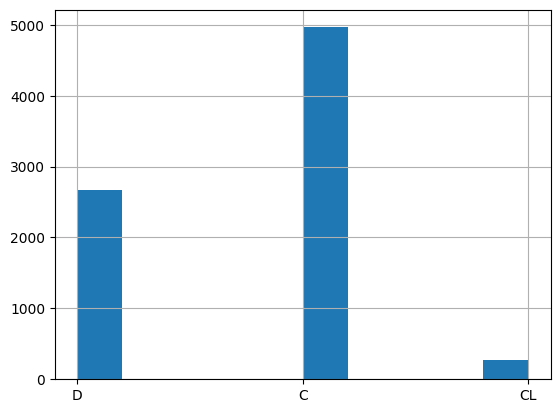

In [21]:
X_train = df_train.drop(['id', 'Status'], axis = 1)
y_train = df_train['Status']

X_test = df_test.drop(['id'], axis = 1)
y_train.hist()

In [22]:
main_pipline.fit(X_train, y_train)

NameError: name 'std_scaler' is not defined

In [ ]:
predicted = main_pipline.predict_proba(X_test)

In [ ]:
result_df = pd.DataFrame(predicted)
result_df = result_df.rename({result_df.columns[0]: 'Status_' + main_pipline.classes_[0], result_df.columns[1]: 'Status_' + main_pipline.classes_[1], result_df.columns[2]: 'Status_' + main_pipline.classes_[2]}, axis=1)
result_df['id'] = df_test.id
result_df = result_df[['id', 'Status_C', 'Status_CL', 'Status_D']]
result_df

In [ ]:
result_df.to_csv('./data/result_2.csv', index = False)

In [ ]:
X_train = preprocessor.transform(X_train)
X_train.head()

In [ ]:
from hyperopt import fmin, tpe, hp, SparkTrials, STATUS_OK, Trials
import itertools
import mlflow
import hyperopt

In [234]:
search_space = {
        'learning_rate': hp.quniform('learning_rate', 0.1, 100.0, 0.1),
        'max_leaf_nodes': hp.quniform('max_leaf_nodes', 1, 1000, 1),
        'max_depth': hp.quniform('max_depth', 1, 1000, 1),
        'min_samples_leaf': hp.quniform('min_samples_leaf', 10, 100, 1),
        'l2_regularization': hp.quniform('l2_regularization', 0, 1.0, 0.001),
    
        # 'activation': hp.choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
        # 'solver': hp.choice('solver', ['lbfgs', 'sgd', 'adam']),
        # 'learning_rate': hp.choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
    }

In [238]:
def objective(space):
    params = {
        'learning_rate': float(space['learning_rate']),
        'max_leaf_nodes' : int(space['max_leaf_nodes']),
        'max_depth' : int(space['max_depth']),
        'min_samples_leaf' : int(space['min_samples_leaf']),
        'l2_regularization' : float(space['l2_regularization']),
        
        # 'activation': space['activation'],
        # 'solver': space['solver'],
        # 'learning_rate': space['learning_rate'],
        }
    
    clf = HistGradientBoostingClassifier(loss = 'log_loss', class_weight = 'balanced', random_state=RANDOM_SEED)
   
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', n_jobs= -1).mean()
    #print('SCORE:', accuracy)
    # Because fmin() tries to minimize the objective, this function must return the negative accuracy. 
    return {'loss': -accuracy, 'status': STATUS_OK}

In [239]:
trials = Trials()

In [240]:
with mlflow.start_run():
    best_hyperparams = fmin(fn = objective,
                       space=search_space,
                       algo = tpe.suggest,
                       max_evals = 100,
                       trials = trials,
                       show_progressbar=True
                       )

100%|██████████| 100/100 [01:27<00:00,  1.15trial/s, best loss: -0.8137887413029729]


In [241]:
print(hyperopt.space_eval(search_space, best_hyperparams))

{'l2_regularization': 0.405, 'learning_rate': 30.900000000000002, 'max_depth': 440.0, 'max_leaf_nodes': 74.0, 'min_samples_leaf': 84.0}


In [ ]:
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
model = HistGradientBoostingClassifier(loss = 'log_loss', class_weight = 'balanced',  scoring = 'accuracy', random_state=RANDOM_SEED)

In [683]:
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_prob_train = model.predict_proba(X_train) 

y_pred_prob_test = model.predict_proba(X_test) 
accuracy_score_train = accuracy_score(y_train, y_pred_train)
log_loss = log_loss()
f1_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
roc_auc_train = roc_auc_score(y_train, y_pred_prob_train, multi_class='ovr')
    
print(f'Модель: {type(model).__name__}\nAccuracy_train: {accuracy_score_train}\nf1 score: {f1_train}\nPrecision: {precision_train}\nRecall: {recall_train}\nROC_AUC: {roc_auc_train}\n')

Модель: HistGradientBoostingClassifier
Accuracy_train: 0.9664769133459835
f1 score: 0.9664769133459835
Precision: 0.9664769133459835
Recall: 0.9664769133459835
ROC_AUC: 0.9970003393398873



In [693]:
model = HistGradientBoostingClassifier(loss = 'log_loss', class_weight = 'balanced',  scoring = 'roc_auc', random_state=RANDOM_SEED)

In [694]:
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_prob_train = model.predict_proba(X_train) 
y_pred_prob_test = model.predict_proba(X_test) 
accuracy_score_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
roc_auc_train = roc_auc_score(y_train, y_pred_prob_train, multi_class='ovr')
    
print(f'Модель: {type(model).__name__}\nAccuracy_train: {accuracy_score_train}\nf1 score: {f1_train}\nPrecision: {precision_train}\nRecall: {recall_train}\nROC_AUC: {roc_auc_train}\n')

Модель: HistGradientBoostingClassifier
Accuracy_train: 0.9669829222011386
f1 score: 0.9669829222011386
Precision: 0.9669829222011386
Recall: 0.9669829222011386
ROC_AUC: 0.9969006277921629



In [684]:
model = HistGradientBoostingClassifier(loss = 'log_loss', class_weight = 'balanced',  scoring = 'accuracy', l2_regularization = 0.226, learning_rate = 10.2, max_depth = 379, max_leaf_nodes = 773, min_samples_leaf = 78, random_state=RANDOM_SEED)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_prob_train = model.predict_proba(X_train) 
accuracy_score_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
roc_auc_train = roc_auc_score(y_train, y_pred_prob_train, multi_class='ovr')
    
print(f'Модель: {type(model).__name__}\nAccuracy_train: {accuracy_score_train}\nf1 score: {f1_train}\nPrecision: {precision_train}\nRecall: {recall_train}\nROC_AUC: {roc_auc_train}\n')

Модель: HistGradientBoostingClassifier
Accuracy_train: 0.4991777356103732
f1 score: 0.4991777356103732
Precision: 0.4991777356103732
Recall: 0.4991777356103732
ROC_AUC: 0.6356533285978125



In [695]:
model = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state = RANDOM_SEED)

In [696]:
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_prob_train = model.predict_proba(X_train) 
y_pred_prob_test = model.predict_proba(X_test) 
accuracy_score_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
roc_auc_train = roc_auc_score(y_train, y_pred_prob_train, multi_class='ovr')
    
print(f'Модель: {type(model).__name__}\nAccuracy_train: {accuracy_score_train}\nf1 score: {f1_train}\nPrecision: {precision_train}\nRecall: {recall_train}\nROC_AUC: {roc_auc_train}\n')

Модель: RandomForestClassifier
Accuracy_train: 1.0
f1 score: 1.0
Precision: 1.0
Recall: 1.0
ROC_AUC: 0.9999999880650597



In [697]:
search_space = {
        'n_estimators': hp.quniform('n_estimators', 100, 10000, 1),
        'criterion': hp.choice('criterion', ['gini', 'entropy', 'log_loss']),
        'max_depth': hp.quniform('max_depth', 1, 1000, 1),
        'max_features': hp.choice('max_features', ['sqrt', 'log2', None]),
        'max_leaf_nodes': hp.quniform('max_leaf_nodes', 1, 1000, 1),
        'class_weight': hp.choice('class_weight', ['balanced', 'balanced_subsample', None]),
        'ccp_alpha': hp.quniform('ccp_alpha', 0.0, 1.0, 0.001),
    
        # 'activation': hp.choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
        # 'solver': hp.choice('solver', ['lbfgs', 'sgd', 'adam']),
        # 'learning_rate': hp.choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
    }

In [699]:
def objective(space):
    params = {
        'n_estimators': int(space['n_estimators']),
        'criterion' : space['criterion'],
        'max_depth' : int(space['max_depth']),
        'max_features' : space['max_features'],
        'max_leaf_nodes' : int(space['max_leaf_nodes']),
        'class_weight' : space['class_weight'],
        'ccp_alpha' : float(space['ccp_alpha']),
        
        # 'activation': space['activation'],
        # 'solver': space['solver'],
        # 'learning_rate': space['learning_rate'],
        }
    
    clf = RandomForestClassifier(n_jobs=-1, random_state = RANDOM_SEED)
   
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', n_jobs= -1).mean()
    #print('SCORE:', accuracy)
    # Because fmin() tries to minimize the objective, this function must return the negative accuracy. 
    return {'loss': -accuracy, 'status': STATUS_OK}

In [700]:
trials = Trials()

In [701]:
with mlflow.start_run():
    best_hyperparams = fmin(fn = objective,
                       space=search_space,
                       algo = tpe.suggest,
                       max_evals = 100,
                       trials = trials,
                       show_progressbar=True
                       )

100%|██████████| 100/100 [01:21<00:00,  1.22trial/s, best loss: -0.8202403542061987]


In [702]:
print(hyperopt.space_eval(search_space, best_hyperparams))

{'ccp_alpha': 0.468, 'class_weight': None, 'criterion': 'gini', 'max_depth': 85.0, 'max_features': 'log2', 'max_leaf_nodes': 371.0, 'n_estimators': 170.0}


In [705]:
model = RandomForestClassifier(ccp_alpha = 0.468, class_weight = None, criterion = 'gini', max_depth = 85, max_features = 'log2', max_leaf_nodes = 371, n_estimators = 170, n_jobs=-1, random_state = RANDOM_SEED)

In [706]:
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_prob_train = model.predict_proba(X_train) 
y_pred_prob_test = model.predict_proba(X_test) 
accuracy_score_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
roc_auc_train = roc_auc_score(y_train, y_pred_prob_train, multi_class='ovr')
    
print(f'Модель: {type(model).__name__}\nAccuracy_train: {accuracy_score_train}\nf1 score: {f1_train}\nPrecision: {precision_train}\nRecall: {recall_train}\nROC_AUC: {roc_auc_train}\n')

Модель: RandomForestClassifier
Accuracy_train: 0.6280834914611005
f1 score: 0.6280834914611005
Precision: 0.6280834914611005
Recall: 0.6280834914611005
ROC_AUC: 0.5

